# Background

   Breast cancer is the most common cancer among women in the world. It account for 25% of all cancer cases, and affected over 2.1 Million people in 2015. It starts when cells in the breast begin to grow out of control. These cells usually form a tumor that can often be seen on an X-ray or felt as a lump.
    
   Early diagnosis significantly increases the chances of surviver. The key challenges against it's detection is how to classify tumors into malignant (Cancer) or benign (not Cancer). A tumor is considered malignant (Cancer) if the cells can grow into surrounding tissues or spread to distant areas of the body. A benign tumor does not invade nearby tissue or spread to other parts of the body the way cancer can. But benign tumors can be serious if they press on vital structures such as blood vessel or nerves.
    
   Machine Learning technique can dramatically improve the level of diagnosis in breast cancer. Research shows that experience physicians can detect cancer by 79% accuracy, while 91%(up to 97%) accuracy can be achieved using Machine Learning techniques.




    

# Project Task

   In this study, we will try to classify tumors into malignant (cancer) or benign using features obtained from several cell images.
   
   Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
   
   
**Attribute Information:**
   
1.  ID number 
2.  Diagnosis (M = malignant, B = benign) 

**Ten real-valued features are computed for each cell nucleus:**

1. Radius (mean of distances from center to points on the perimeter) 
2. Texture (standard deviation of gray-scale values) 
3. Perimeter 
4. Area 
5. Smoothness (local variation in radius lengths) 
6. Compactness (perimeter^2 / area - 1.0) 
7. Concavity (severity of concave portions of the contour) 
8. Concave points (number of concave portions of the contour) 
9. Symmetry 
10. Fractal dimension ("coastline approximation" - 1)


## Import needed Python Libraries and the dataset

In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all" # default is 'last'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Import Cancer data from the Sklearn library

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data
cancer.target
cancer.target_names
cancer.feature_names
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- mean radius = mean of distances from center to points on the perimeter
- mean texture = standard deviation of gray-scale values
- mean perimeter = mean size of the core tumor
- mean area = 
- mean smoothness = mean of local variation in radius lengths
- mean compactness = mean of perimeter^2 / area - 1.0
- mean concavity = mean of severity of concave portions of the contour
- mean concave points = mean for number of concave portions of the contour
- mean symmetry =
- mean fractal dimension = mean for "coastline approximation" - 1
- radius error = standard error for the mean of distances from center to points on the perimeter
- texture error = standard error for standard deviation of gray-scale values
- perimeter error =
- area error =
- smoothness error = standard error for local variation in radius lengths
- compactness error = standard error for perimeter^2 / area - 1.0
- concavity error = standard error for severity of concave portions of the contour
- concave points error = standard error for number of concave portions of the contour
- symmetry error =
- fractal dimension error = standard error for "coastline approximation" - 1
- worst radius = "worst" or largest mean value for mean of distances from center to points on the perimeter
- worst texture = "worst" or largest mean value for standard deviation of gray-scale values
- worst perimeter =
- worst smoothness = "worst" or largest mean value for local variation in radius lengths
- worst compactness = "worst" or largest mean value for perimeter^2 / area - 1.0
- worst concavity = "worst" or largest mean value for severity of concave portions of the contour
- worst concave points = "worst" or largest mean value for number of concave portions of the contour
- worst fractal dimension = "worst" or largest mean value for "coastline approximation" - 1<br>

### Convert the dataset into a dataframe.

In [2]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

df_cancer.head()
df_cancer.target.count()
len(df_cancer.index)
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


569

569

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Explore the dataframe

Shape, column names, ...

In [3]:
df_cancer.shape

(569, 31)

As we can see,we have 596 rows (Instances) and 31 columns(Features)

In [4]:
df_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Above is the name of each columns in our dataframe.

## Now, we could visualize our data

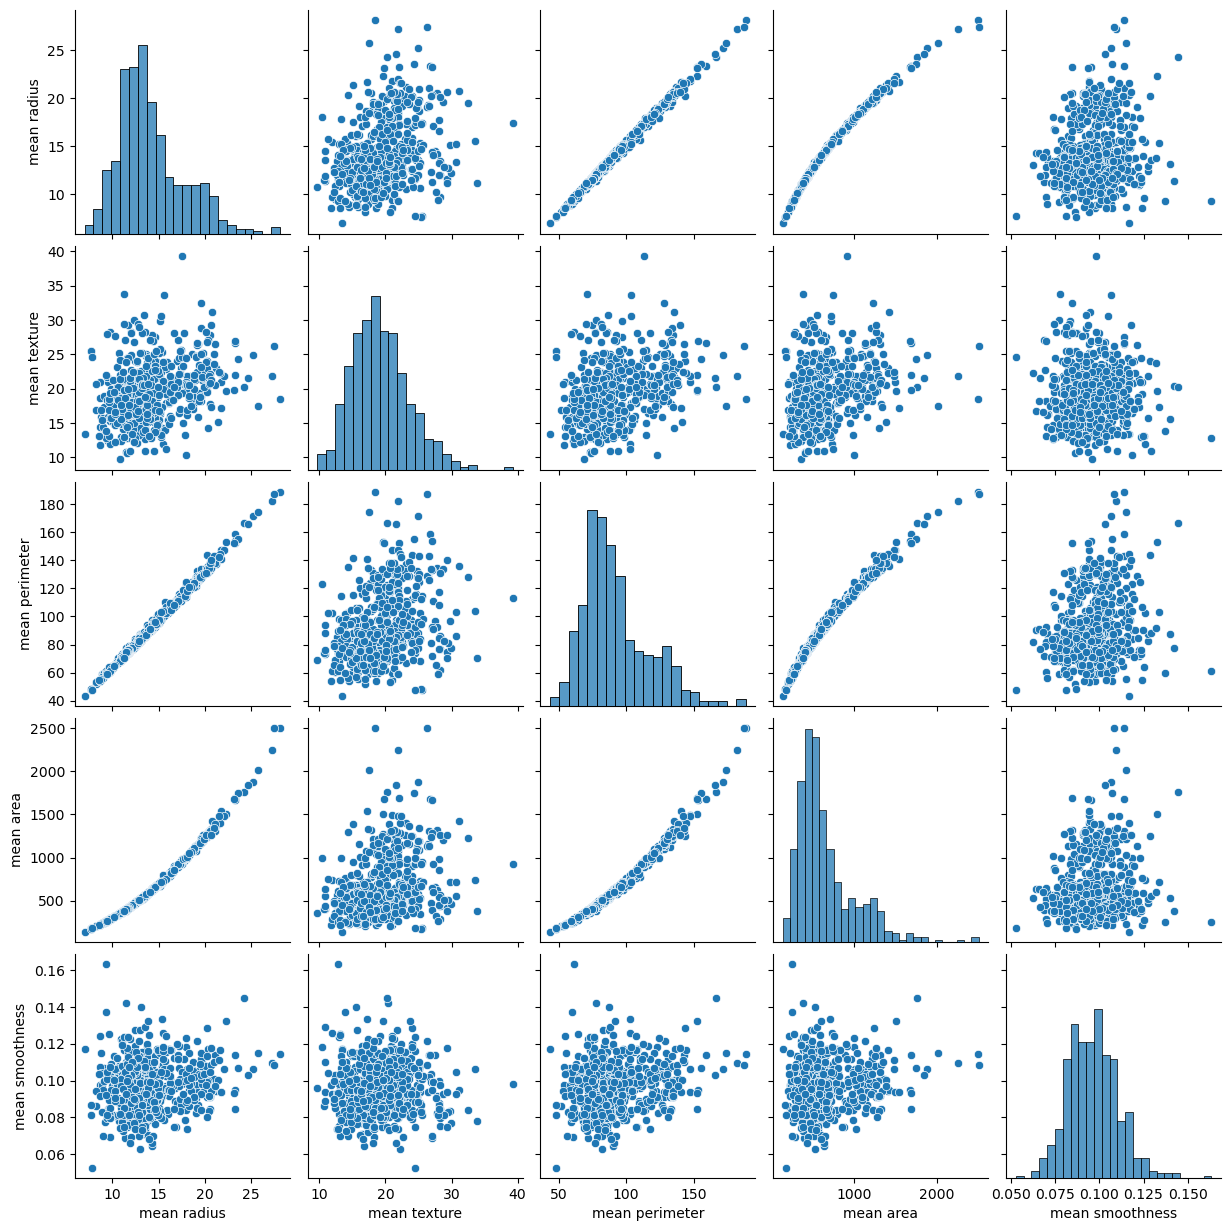

In [5]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'] )

The above plots shows the relationship between our features. But the only problem with them is that they do not show us which of the "dots" is Malignant and which is Benign. 

This issue will be addressed below by using "target" variable as the "hue" for the plots.

In [6]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'] )

**Note:** 
    
  1.0 (Orange) = Benign (No Cancer)
  
  0.0 (Blue) = Malignant (Cancer)

### How many Benign and Malignant do we have in our dataset?

In [7]:
df_cancer['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

As we can see, we have 212 - Malignant, and 357 - Benign

 Let's visualize our counts:

In [8]:
sns.countplot(df_cancer['target'], label = "Count") 

C:\Users\jpf\anaconda32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

## Check the correlation between the features 

In [9]:
plt.figure(figsize=(20,12)) 
sns.heatmap(df_cancer.corr(), annot=True) 
ax=plt.gca()
ax.set_ylim([0,31])
corr_mat=df_cancer.corr()
corr_pairs = corr_mat.unstack()
corr_pairs["target"].abs().sort_values(kind="quicksort")

<Figure size 2000x1200 with 0 Axes>

<AxesSubplot:>

(0.0, 31.0)

symmetry error             0.006522
texture error              0.008303
mean fractal dimension     0.012838
smoothness error           0.067016
fractal dimension error    0.077972
concavity error            0.253730
compactness error          0.292999
worst fractal dimension    0.323872
mean symmetry              0.330499
mean smoothness            0.358560
concave points error       0.408042
mean texture               0.415185
worst symmetry             0.416294
worst smoothness           0.421465
worst texture              0.456903
area error                 0.548236
perimeter error            0.556141
radius error               0.567134
worst compactness          0.590998
mean compactness           0.596534
worst concavity            0.659610
mean concavity             0.696360
mean area                  0.708984
mean radius                0.730029
worst area                 0.733825
mean perimeter             0.742636
worst radius               0.776454
mean concave points        0

There is a strong correlation between the mean radius, mean perimeter, mean concave points, ... and the target

# Classification using the Suport Vector Machine (SVM) algorithm¶

## Prepare the dataset

**From our dataset, let's create the target and predictor matrix**

- "y" = Is the feature we are trying to predict (Output). In this case we are trying to predict wheither our "target" is Cancer (Malignant) or not (Benign). I.e. we are going to use the "target" feature here.
- "X" = The predictors which are the remaining columns (mean radius, mean texture, mean perimeter, mean area, mean smoothness, etc)

In [10]:
X = df_cancer.drop(['target'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X.head()
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
y = df_cancer['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

## Create the training and testing data

Now that we've assigned values to our "X" and "y", the next step is to import the python library that will help us to split our dataset into training and testing data.

- Training data = Is the subset of our data used to train our model.
- Testing data =  Is the subset of our data that the model hasn't seen before. This is used to test the performance of our model.

In [12]:
from sklearn.model_selection import train_test_split

Let's split our data using 80% for training and the remaining 20% for testing.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

## Define the SVM Model 

In [14]:
from sklearn.svm import SVC
svc_model = SVC(gamma="auto")

## Train the SVM model with our "training" dataset.

In [15]:
svc_model.fit(X_train, y_train)

SVC(gamma='auto')

## Use the trained model to make a prediction using our testing data

In [16]:
y_predict = svc_model.predict(X_test)

## Check the accuracy of the predictions using a confusion matrix 

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_predict)
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

array([[ 0, 48],
       [ 0, 66]], dtype=int64)

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,48,0


In [18]:
sns.heatmap(confusion, annot=True)
ax=plt.gca()
ax.set_ylim([0,2])

<AxesSubplot:>

(0.0, 2.0)

As we can see, our model did not do a very good job in its predictions. It predicted that 48 healthy patients have cancer.<br>

Let's try to improve the performance of our model.

# Improving our Model

## Scale or Standardize the Training Data

In [19]:
from sklearn.preprocessing import StandardScaler

              
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = SVC()
model.fit(X_train_scaled, y_train)

SVC()

In [20]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cm

array([[47,  1],
       [ 0, 66]], dtype=int64)

## SVM with Normalized data

In [21]:
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,1,47


In [22]:
sns.heatmap(confusion,annot=True,fmt="d")
ax=plt.gca()
ax.set_ylim([0,2])

<AxesSubplot:>

(0.0, 2.0)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        48
         1.0       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



# Use of Tensorflow.keras to implement a MLP model

In [39]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import tensorflow as tf

tf.random.set_seed(1)

model = Sequential()
model.add(Dense(64, input_dim=30, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(32,activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
model.summary()

trained_model = model.fit(X_train_scaled,y_train,verbose = 0,epochs = 100, 
                          batch_size = 64)

# evaluate the model
loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Accuracy: {acc:.3f}')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                1984      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
 activation_7 (Activation)   (None, 1)                 0         
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________
Test Accuracy: 1.000


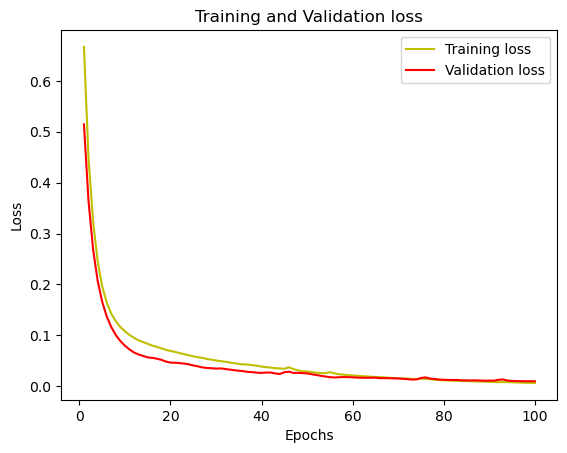

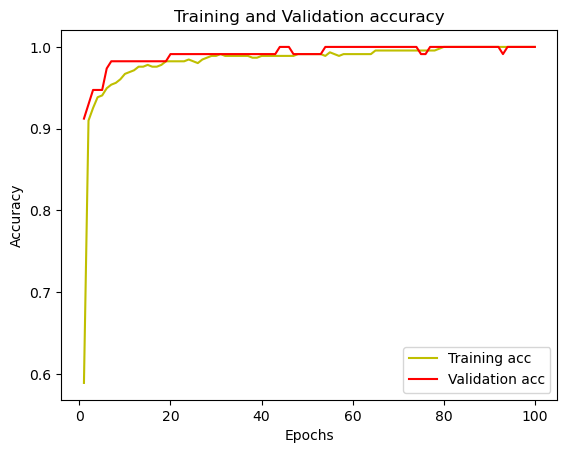

In [34]:
%matplotlib inline
# plot the training and validation accuracy and loss at each epochs:
loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()

acc = trained_model.history['accuracy']
val_acc = trained_model.history['val_accuracy']
plt.plot(epochs,acc,'y',label = 'Training acc')
plt.plot(epochs,val_acc,'r',label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

4/4 [==============================] - 0s 1ms/step


<AxesSubplot:>

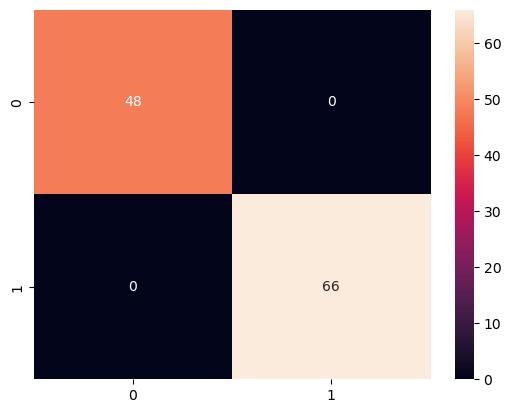

In [38]:
# Predicting the Test set results:
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot = True)